# IAMC Reporting

# Plottings

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

import matplotlib.pyplot as plt

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df
from message_ix.tools.add_dac import add_tech
from message_ix.tools.add_dac import get_report
from message_ix.tools.add_dac import get_values

%matplotlib inline

<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


In [2]:
colors = {"SSP_SSP2_v1.0":"tab:orange","SSP_SSP5_v1.0":"tab:purple","SSP_SSP4_v1.0":"tab:blue"}

setups = {'SSP_SSP2_v1.0':'SSP2 - Low Overshoot_Relaxed-CCS-v2',
          'SSP_SSP4_v1.0':'SSP4 - Low Overshoot_Relaxed-CCS-v2',
          'SSP_SSP5_v1.0':'SSP5 - Low Overshoot_Relaxed-CCS-v2',
          }

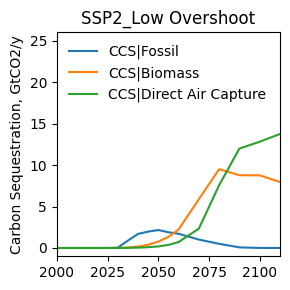

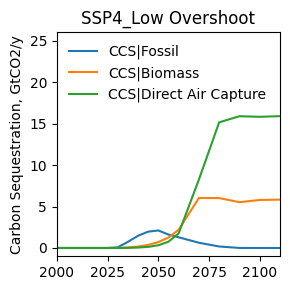

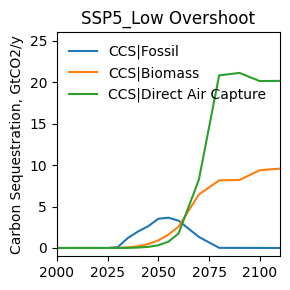

In [3]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = [
    'Carbon Sequestration|CCS|Fossil',
    'Carbon Sequestration|CCS|Biomass',
    'Carbon Sequestration|CCS|Direct Air Capture'
]

for key,val in setups.items():
    fig, ax = plt.subplots(figsize=(3,3))

    fname = f'/{key}_{val}.xlsx'
    df = pd.read_excel(path+fname)
    df = df.fillna('0')
    df = pyam.IamDataFrame(data=df)
    data = df.filter(region='World', variable=var_plot)

    data_plot = {var: list(data.filter(variable=var).timeseries().div(1000).iloc[0])
                          for var in var_plot}

    years = list(data.timeseries().columns)

    for var in var_plot:
        ax.plot(years, data_plot[var], label=var.replace('Carbon Sequestration|',''))
    sspname = key.replace('SSP_','').replace('v1.0','')
    ax.set_title(f'{sspname}Low Overshoot')

    ax.set_ylabel("Carbon Sequestration, GtCO2/y")
    ax.set_ylim(-1,26)
    ax.set_xlim(2000,2110)
    ax.legend(ncol=1, frameon=False, loc='upper left')

    plt.tight_layout()
    fig.savefig(f"sspreview_sv1/{sspname}_sequestration-GLB.png",dpi=150)
    plt.show()

        

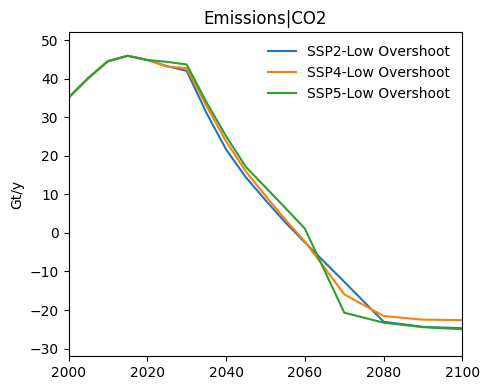

In [4]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = ['Emissions|CO2']

fig, ax = plt.subplots(figsize=(5,4))

for key,val in setups.items():
    fname = f'/{key}_{val}.xlsx'
    df = pd.read_excel(path+fname)
    df = df.fillna('0')
    df = pyam.IamDataFrame(data=df)
    data = df.filter(region='World', variable=var_plot)

    data_plot = {var: list(data.filter(variable=var).timeseries().div(1000).iloc[0])
                          for var in var_plot}

    years = list(data.timeseries().columns)
    
    sspname = key.replace('SSP_','').replace('_v1.0','')
    for var in var_plot:
        ax.plot(years, data_plot[var], label=f'{sspname}-Low Overshoot')
ax.set_title(var_plot[0])

ax.set_ylabel("Gt/y")
ax.set_ylim(-32,52)
ax.set_xlim(2000,2100)
ax.legend(ncol=1, frameon=False)

plt.tight_layout()
fig.savefig(f"sspreview_sv1/EmissionsCO2_GLB.png",dpi=150)
plt.show()

        

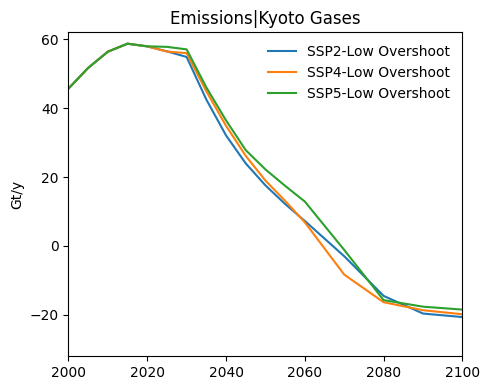

In [13]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = ['Emissions|Kyoto Gases']

fig, ax = plt.subplots(figsize=(5,4))

for key,val in setups.items():
    fname = f'/{key}_{val}.xlsx'
    df = pd.read_excel(path+fname)
    df = df.fillna('0')
    df = pyam.IamDataFrame(data=df)
    data = df.filter(region='World', variable=var_plot)

    data_plot = {var: list(data.filter(variable=var).timeseries().div(1000).iloc[0])
                          for var in var_plot}

    years = list(data.timeseries().columns)
    
    sspname = key.replace('SSP_','').replace('_v1.0','')
    for var in var_plot:
        ax.plot(years, data_plot[var], label=f'{sspname}-Low Overshoot')
ax.set_title(var_plot[0])

ax.set_ylabel("Gt/y")
ax.set_ylim(-32,62)
ax.set_xlim(2000,2100)
ax.legend(ncol=1, frameon=False)

plt.tight_layout()
fig.savefig(f"sspreview_sv1/EmissionsKyotoGasses_GLB.png",dpi=150)
plt.show()

        

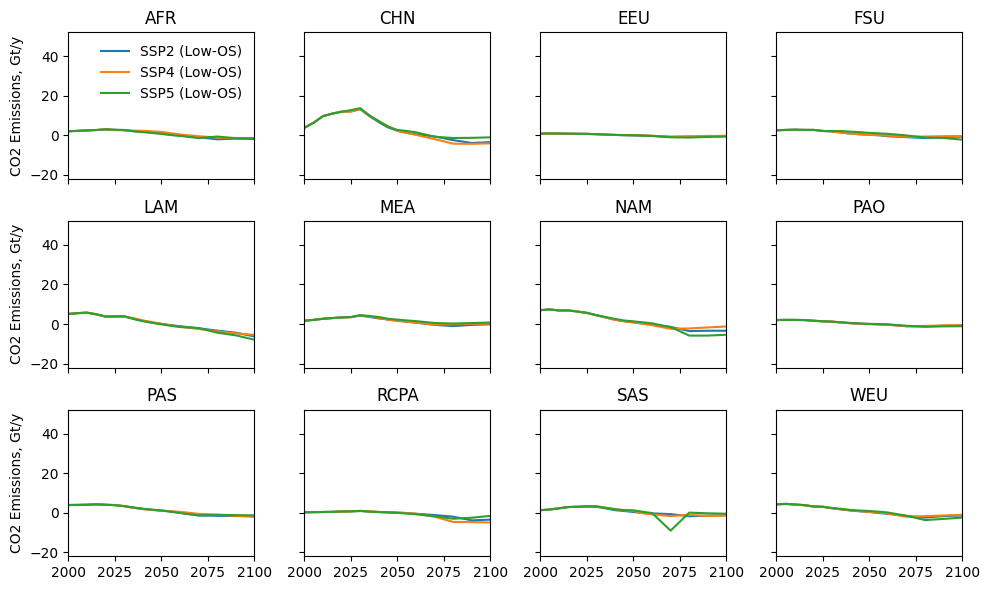

In [5]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = ['Emissions|CO2']
regions = ["AFR","CHN","EEU","FSU","LAM","MEA","NAM","PAO","PAS","RCPA","SAS","WEU"]

# SSP2
f2name = '/SSP_SSP2_v1.0_SSP2 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df2 = pd.read_excel(path+f2name)
df2 = df2.fillna('0')
df2 = pyam.IamDataFrame(data=df2)

# SSP4
f4name = '/SSP_SSP4_v1.0_SSP4 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df4 = pd.read_excel(path+f4name)
df4 = df4.fillna('0')
df4 = pyam.IamDataFrame(data=df4)

# SSP5
f5name = '/SSP_SSP5_v1.0_SSP5 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df5 = pd.read_excel(path+f5name)
df5 = df5.fillna('0')
df5 = pyam.IamDataFrame(data=df5)


fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,6), sharex=True, sharey=True)
counter = 0
for reg in regions:
    r = np.int(np.floor(counter/4))
    c = np.int(counter - 4*r)
    
    data2= df2.filter(region=reg, variable=var_plot)
    data2_plot = {var: list(data2.filter(variable=var).timeseries().div(1000).iloc[0])
                           for var in var_plot}
    
    data4= df4.filter(region=reg, variable=var_plot)
    data4_plot = {var: list(data4.filter(variable=var).timeseries().div(1000).iloc[0])
                           for var in var_plot}
    
    data5= df5.filter(region=reg, variable=var_plot)
    data5_plot = {var: list(data5.filter(variable=var).timeseries().div(1000).iloc[0])
                           for var in var_plot}
    
    years = list(data.timeseries().columns)
    
    for var in var_plot:
        axs[r,c].plot(years, data2_plot[var], label=f'SSP2 (Low-OS)')
        axs[r,c].plot(years, data4_plot[var], label=f'SSP4 (Low-OS)')
        axs[r,c].plot(years, data5_plot[var], label=f'SSP5 (Low-OS)')
    
    axs[r,c].set_title(reg)
    
    if c == 0:
        axs[r,c].set_ylabel("CO2 Emissions, Gt/y")
        axs[r,c].set_ylim(-22,52)
        axs[r,c].set_xlim(2000,2100)

    counter += 1
    
    
axs[0,0].legend(ncol=1, frameon=False)

fig.tight_layout()
fig.savefig(f"sspreview_sv1/EmissionsCO2_REG.png",dpi=150)
plt.show()   

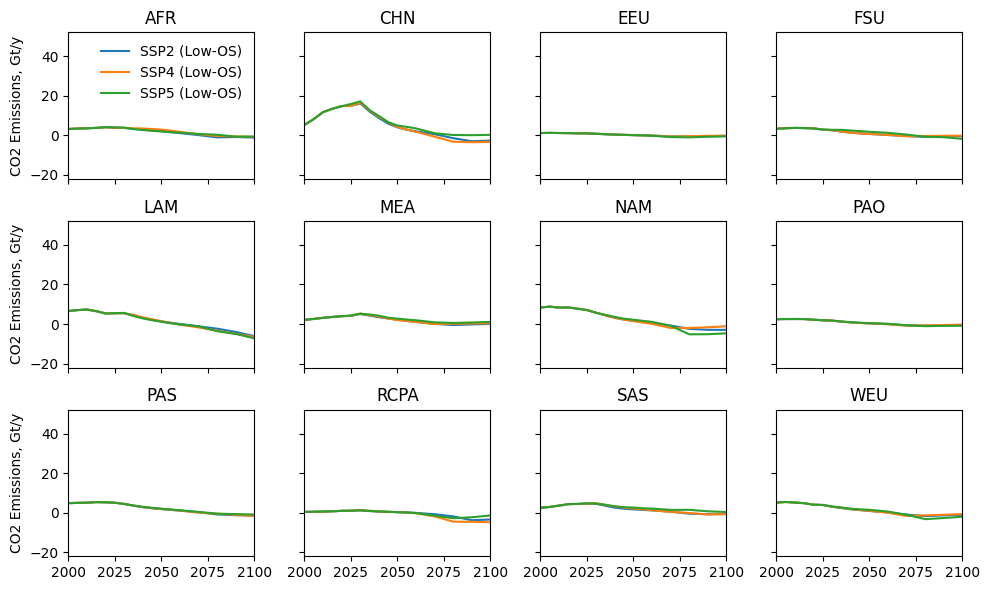

In [14]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = ['Emissions|Kyoto Gases']
regions = ["AFR","CHN","EEU","FSU","LAM","MEA","NAM","PAO","PAS","RCPA","SAS","WEU"]

# SSP2
f2name = '/SSP_SSP2_v1.0_SSP2 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df2 = pd.read_excel(path+f2name)
df2 = df2.fillna('0')
df2 = pyam.IamDataFrame(data=df2)

# SSP4
f4name = '/SSP_SSP4_v1.0_SSP4 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df4 = pd.read_excel(path+f4name)
df4 = df4.fillna('0')
df4 = pyam.IamDataFrame(data=df4)

# SSP5
f5name = '/SSP_SSP5_v1.0_SSP5 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df5 = pd.read_excel(path+f5name)
df5 = df5.fillna('0')
df5 = pyam.IamDataFrame(data=df5)


fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,6), sharex=True, sharey=True)
counter = 0
for reg in regions:
    r = np.int(np.floor(counter/4))
    c = np.int(counter - 4*r)
    
    data2= df2.filter(region=reg, variable=var_plot)
    data2_plot = {var: list(data2.filter(variable=var).timeseries().div(1000).iloc[0])
                           for var in var_plot}
    
    data4= df4.filter(region=reg, variable=var_plot)
    data4_plot = {var: list(data4.filter(variable=var).timeseries().div(1000).iloc[0])
                           for var in var_plot}
    
    data5= df5.filter(region=reg, variable=var_plot)
    data5_plot = {var: list(data5.filter(variable=var).timeseries().div(1000).iloc[0])
                           for var in var_plot}
    
    years = list(data.timeseries().columns)
    
    for var in var_plot:
        axs[r,c].plot(years, data2_plot[var], label=f'SSP2 (Low-OS)')
        axs[r,c].plot(years, data4_plot[var], label=f'SSP4 (Low-OS)')
        axs[r,c].plot(years, data5_plot[var], label=f'SSP5 (Low-OS)')
    
    axs[r,c].set_title(reg)
    
    if c == 0:
        axs[r,c].set_ylabel("CO2 Emissions, Gt/y")
        axs[r,c].set_ylim(-22,52)
        axs[r,c].set_xlim(2000,2100)

    counter += 1
    
    
axs[0,0].legend(ncol=1, frameon=False)

fig.tight_layout()
fig.savefig(f"sspreview_sv1/EmissionsKyotoGasses_REG.png",dpi=150)
plt.show()   

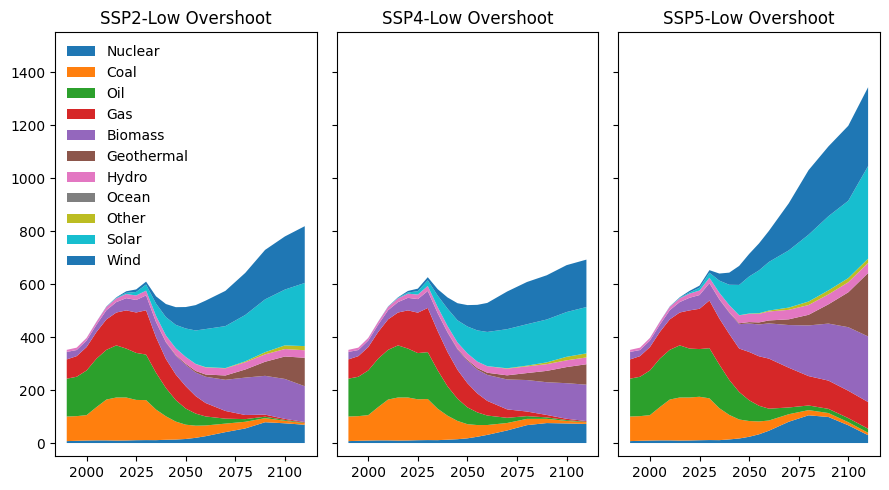

In [6]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = ['Primary Energy|Nuclear',
            'Primary Energy|Coal',
            'Primary Energy|Oil',
            'Primary Energy|Gas',
            'Primary Energy|Biomass',
            'Primary Energy|Geothermal',
            'Primary Energy|Hydro',
            'Primary Energy|Ocean',
            'Primary Energy|Other',
            'Primary Energy|Solar',
            'Primary Energy|Wind']

# SSP2
f2name = '/SSP_SSP2_v1.0_SSP2 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df2 = pd.read_excel(path+f2name)
df2 = df2.fillna('0')
df2 = pyam.IamDataFrame(data=df2)

# SSP4
f4name = '/SSP_SSP4_v1.0_SSP4 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df4 = pd.read_excel(path+f4name)
df4 = df4.fillna('0')
df4 = pyam.IamDataFrame(data=df4)

# SSP5
f5name = '/SSP_SSP5_v1.0_SSP5 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df5 = pd.read_excel(path+f5name)
df5 = df5.fillna('0')
df5 = pyam.IamDataFrame(data=df5)

fig, axs = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(9,5))
count = 0
for key,val in setups.items():
    if key == 'SSP_SSP2_v1.0':
        df = df2
    elif key == 'SSP_SSP4_v1.0':
        df = df4
    else:
        df = df5
    
    data = df.filter(region='World', variable=var_plot)

    data_plot = {var: list(data.filter(variable=var).timeseries().iloc[0]) 
                 for var in var_plot}

    years = list(data.timeseries().columns)

    axs[count].stackplot(years,data_plot.values(),
                  labels=[label.replace('Primary Energy|', '') 
                          for label in list(data_plot.keys())]
                 )
    sspname = key.replace('SSP_','').replace('_v1.0','')
    
    axs[count].set_title(f'{sspname}-Low Overshoot')
    count += 1

axs[0].set_ylim(-50,1550)
axs[0].legend(ncol=1, frameon=False, loc='upper left')

plt.tight_layout()
fig.savefig(f'sspreview_sv1/Primary Energy_GLB.png', dpi=150)
plt.show()

        

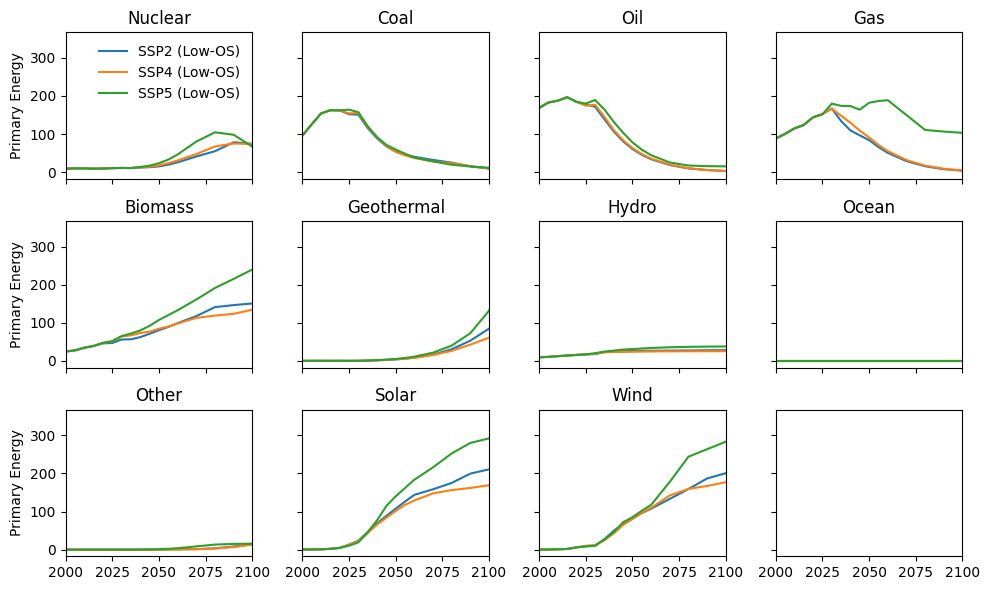

In [7]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = ['Primary Energy|Nuclear',
            'Primary Energy|Coal',
            'Primary Energy|Oil',
            'Primary Energy|Gas',
            'Primary Energy|Biomass',
            'Primary Energy|Geothermal',
            'Primary Energy|Hydro',
            'Primary Energy|Ocean',
            'Primary Energy|Other',
            'Primary Energy|Solar',
            'Primary Energy|Wind']

regions = ["AFR","CHN","EEU","FSU","LAM","MEA","NAM","PAO","PAS","RCPA","SAS","WEU"]

# SSP2
f2name = '/SSP_SSP2_v1.0_SSP2 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df2 = pd.read_excel(path+f2name)
df2 = df2.fillna('0')
df2 = pyam.IamDataFrame(data=df2)

# SSP4
f4name = '/SSP_SSP4_v1.0_SSP4 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df4 = pd.read_excel(path+f4name)
df4 = df4.fillna('0')
df4 = pyam.IamDataFrame(data=df4)

# SSP5
f5name = '/SSP_SSP5_v1.0_SSP5 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df5 = pd.read_excel(path+f5name)
df5 = df5.fillna('0')
df5 = pyam.IamDataFrame(data=df5)



fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,6), sharex=True, sharey=True)
counter = 0
for var in var_plot:
    r = np.int(np.floor(counter/4))
    c = np.int(counter - 4*r)
    
    data2_plot = list(df2.filter(region="World", variable=var).timeseries().iloc[0])
    data4_plot = list(df4.filter(region="World", variable=var).timeseries().iloc[0])
    data5_plot = list(df5.filter(region="World", variable=var).timeseries().iloc[0])
    
    years = list(df2.timeseries().columns)
        
    axs[r,c].plot(years, data2_plot, label=f'SSP2 (Low-OS)')
    axs[r,c].plot(years, data4_plot, label=f'SSP4 (Low-OS)')
    axs[r,c].plot(years, data5_plot, label=f'SSP5 (Low-OS)')
    
    axs[r,c].set_title(var.replace('Primary Energy|',''))
    
    if c == 0:
        axs[r,c].set_ylabel("Primary Energy")
        #axs[r,c].set_ylim(-22,52)
        axs[r,c].set_xlim(2000,2100)

    counter += 1
    
    
axs[0,0].legend(ncol=1, frameon=False)

plt.tight_layout()
fig.savefig(f'sspreview_sv1/Primary Energy_GLB_timeseries.png', dpi=150)
plt.show()

        

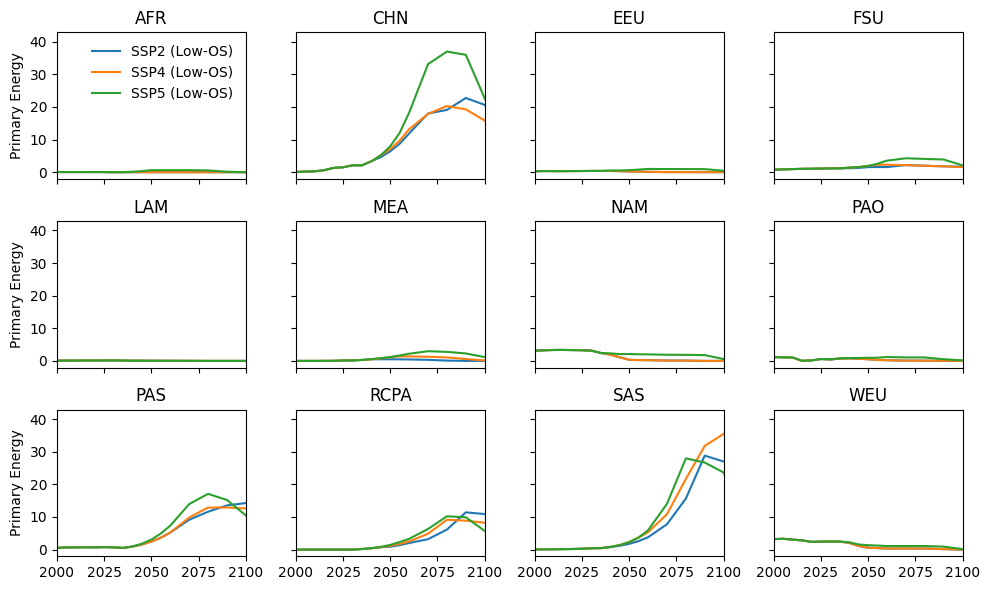

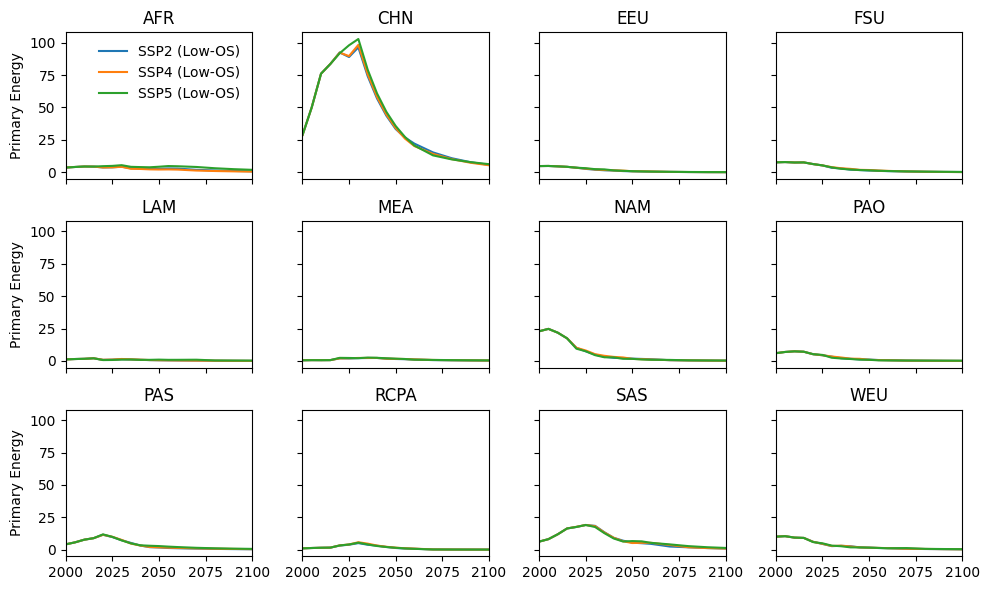

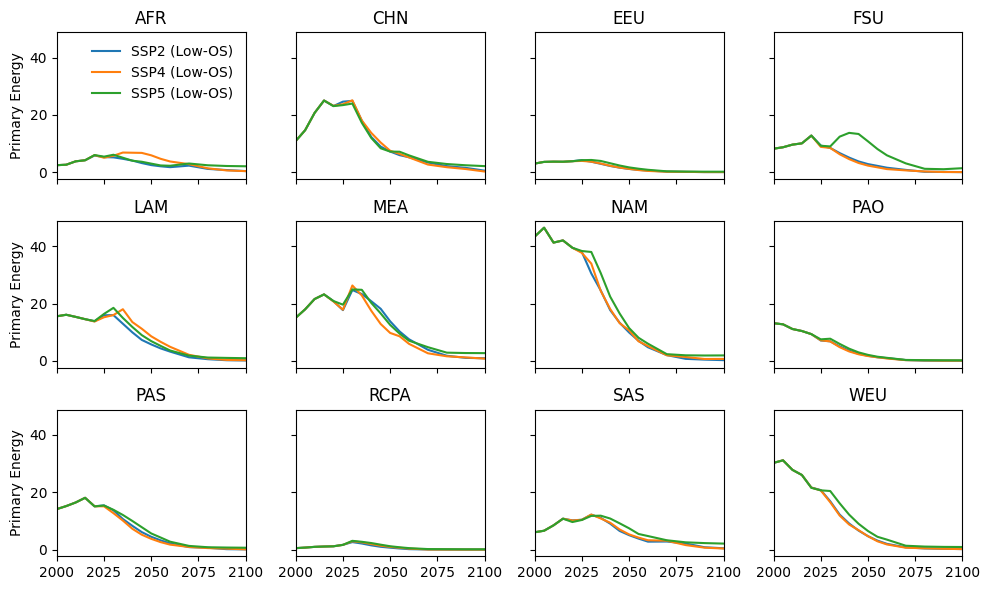

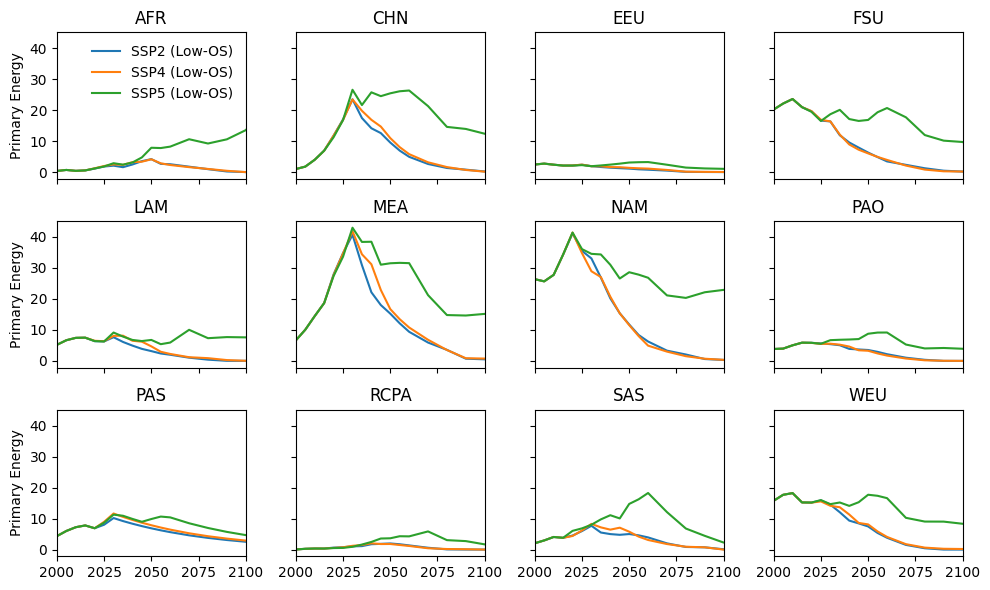

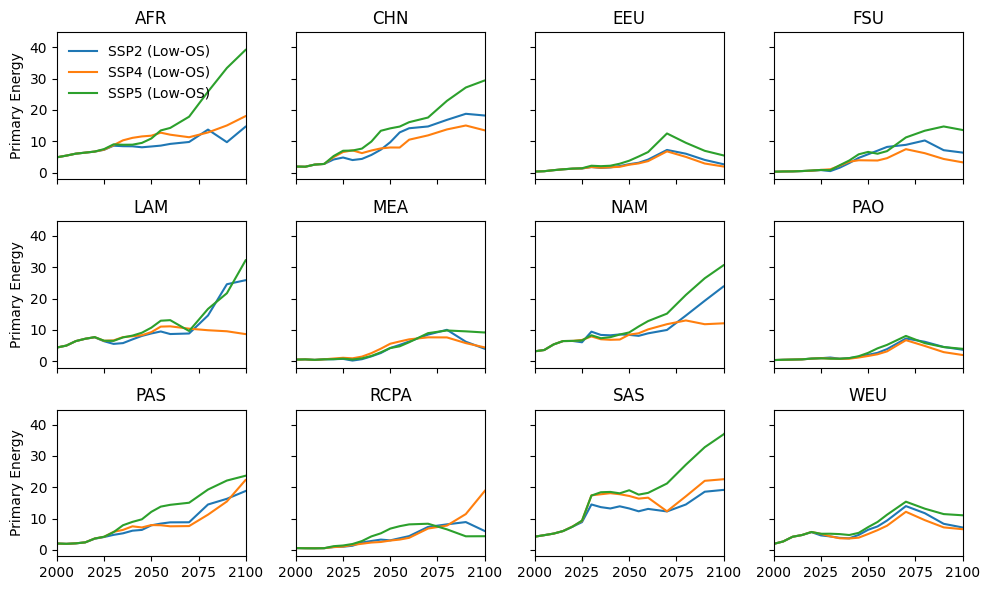

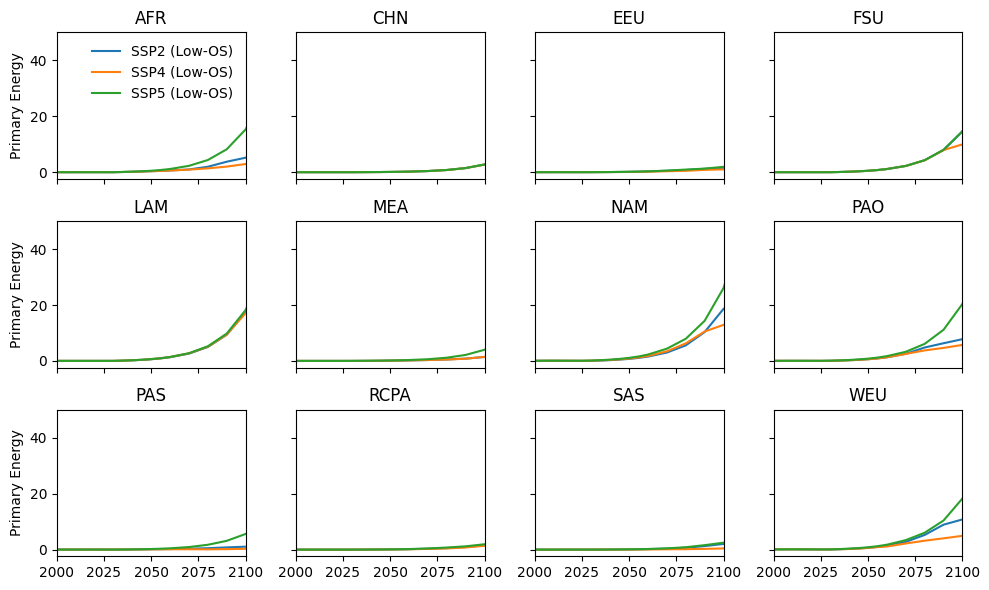

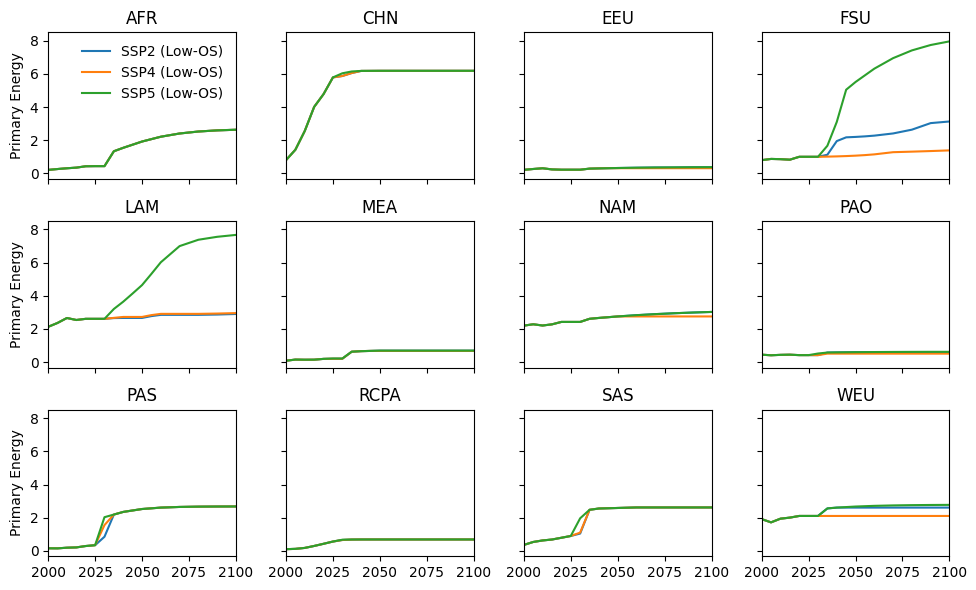

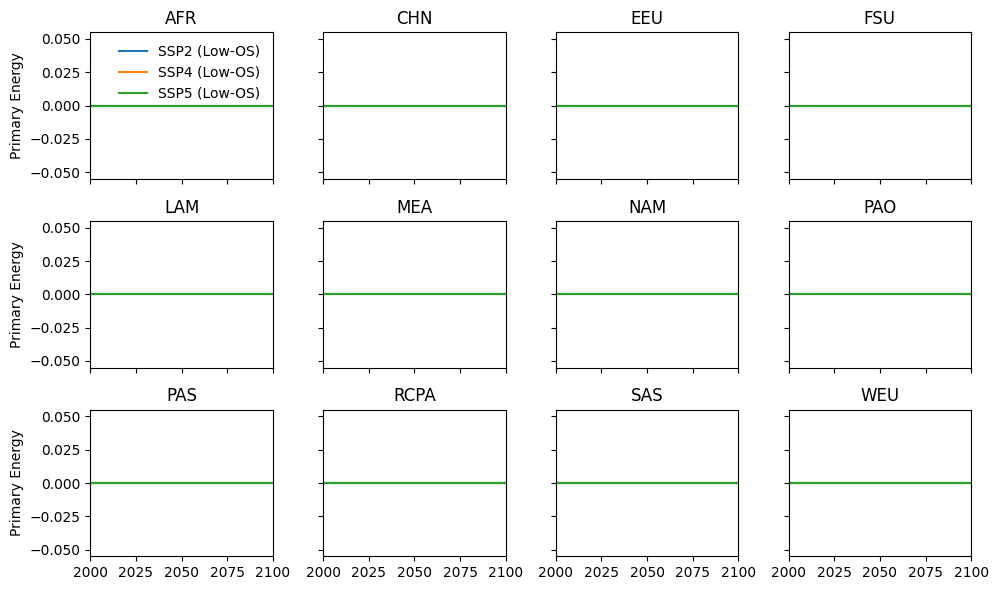

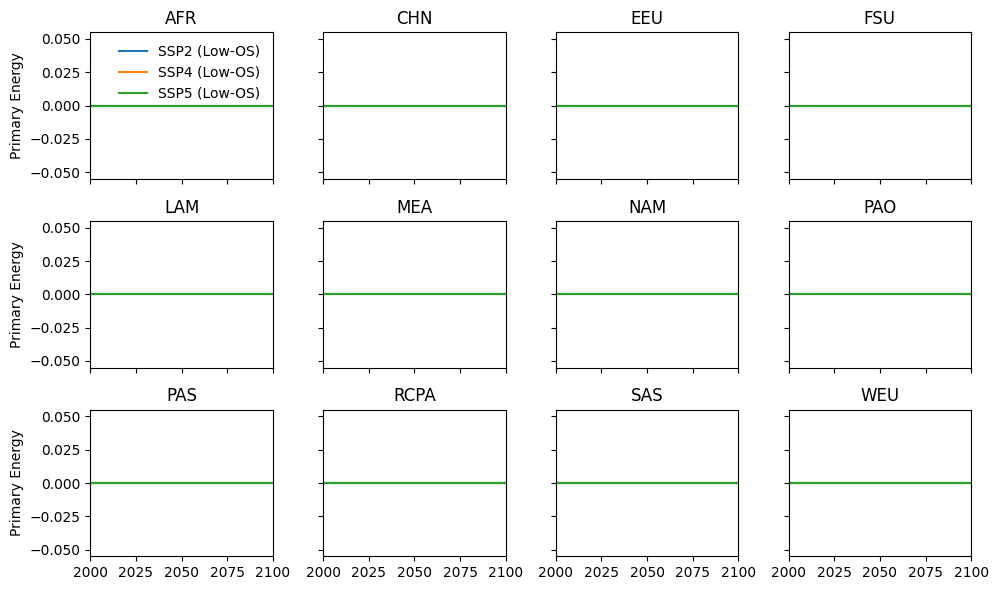

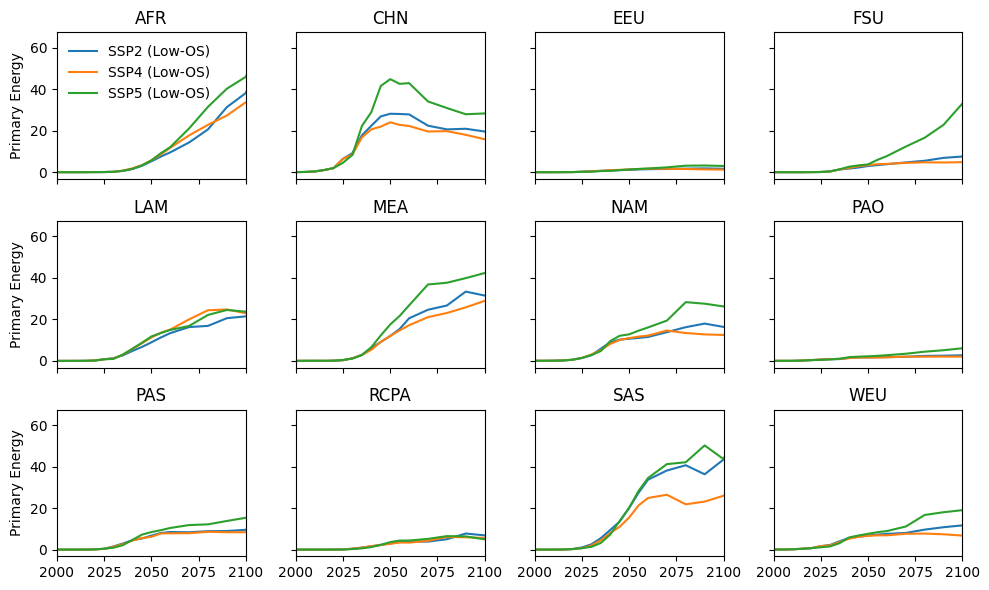

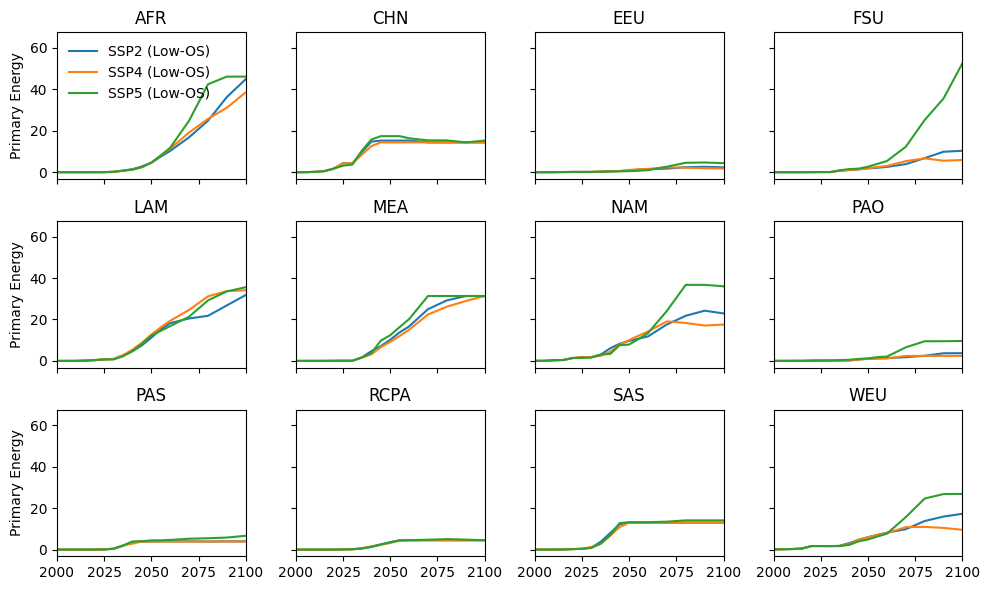

In [8]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = ['Primary Energy|Nuclear',
            'Primary Energy|Coal',
            'Primary Energy|Oil',
            'Primary Energy|Gas',
            'Primary Energy|Biomass',
            'Primary Energy|Geothermal',
            'Primary Energy|Hydro',
            'Primary Energy|Ocean',
            'Primary Energy|Other',
            'Primary Energy|Solar',
            'Primary Energy|Wind']

regions = ["AFR","CHN","EEU","FSU","LAM","MEA","NAM","PAO","PAS","RCPA","SAS","WEU"]

# SSP2
f2name = '/SSP_SSP2_v1.0_SSP2 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df2 = pd.read_excel(path+f2name)
df2 = df2.fillna('0')
df2 = pyam.IamDataFrame(data=df2)

# SSP4
f4name = '/SSP_SSP4_v1.0_SSP4 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df4 = pd.read_excel(path+f4name)
df4 = df4.fillna('0')
df4 = pyam.IamDataFrame(data=df4)

# SSP5
f5name = '/SSP_SSP5_v1.0_SSP5 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df5 = pd.read_excel(path+f5name)
df5 = df5.fillna('0')
df5 = pyam.IamDataFrame(data=df5)


for var in var_plot:
    fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,6), sharex=True, sharey=True)
    counter = 0
    for reg in regions:
        r = np.int(np.floor(counter/4))
        c = np.int(counter - 4*r)

        data2_plot = list(df2.filter(region=reg, variable=var).timeseries().iloc[0])
        data4_plot = list(df4.filter(region=reg, variable=var).timeseries().iloc[0])
        data5_plot = list(df5.filter(region=reg, variable=var).timeseries().iloc[0])
        years = list(df2.timeseries().columns)

        axs[r,c].plot(years, data2_plot, label=f'SSP2 (Low-OS)')
        axs[r,c].plot(years, data4_plot, label=f'SSP4 (Low-OS)')
        axs[r,c].plot(years, data5_plot, label=f'SSP5 (Low-OS)')

        axs[r,c].set_title(reg)

        if c == 0:
            axs[r,c].set_ylabel("Primary Energy")
            #axs[r,c].set_ylim(-22,52)
            axs[r,c].set_xlim(2000,2100)

        counter += 1

    vname = var.replace('Primary Energy|','')
    axs[0,0].legend(ncol=1, frameon=False)

    plt.tight_layout()
    fig.savefig(f'sspreview_sv1/Primary Energy_{vname}_REG.png', dpi=150)
    plt.show()

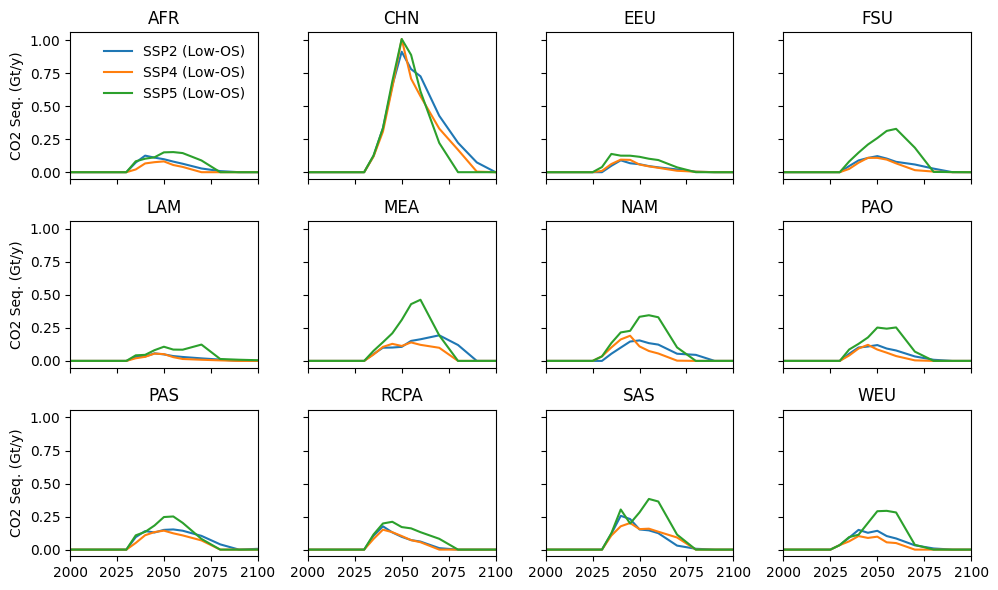

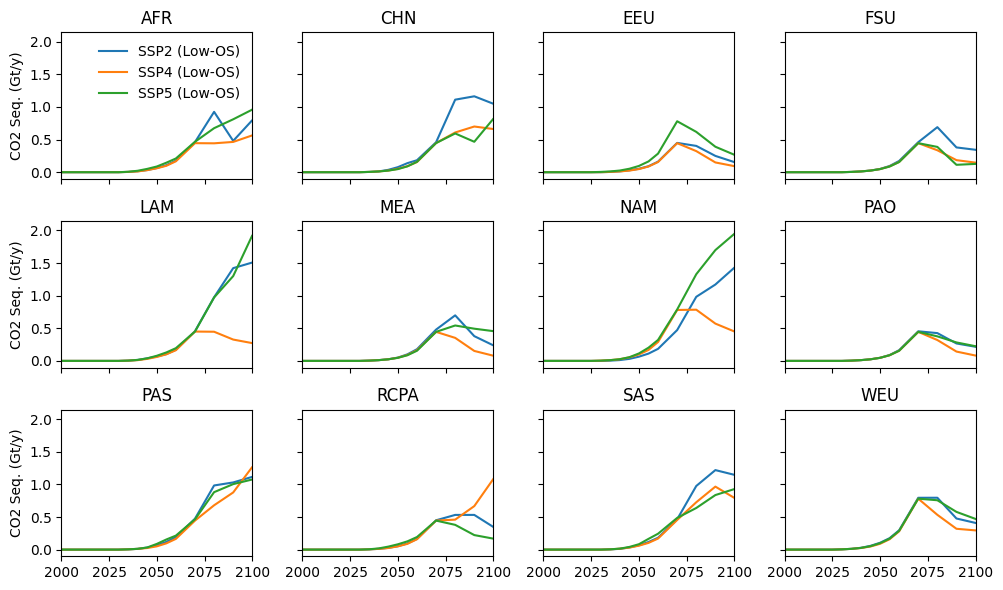

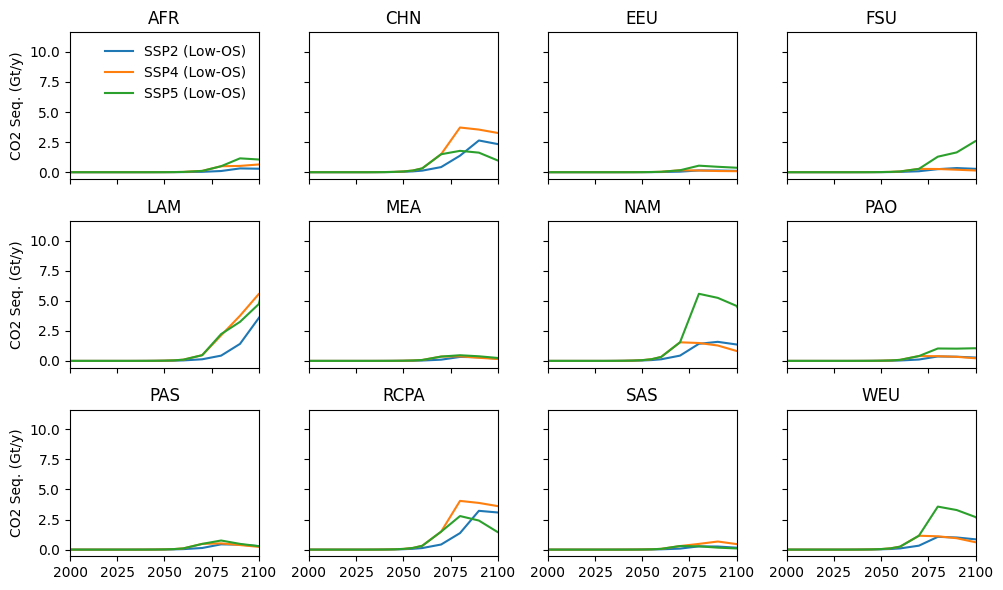

In [9]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = [
    'Carbon Sequestration|CCS|Fossil',
    'Carbon Sequestration|CCS|Biomass',
    'Carbon Sequestration|CCS|Direct Air Capture'
]

regions = ["AFR","CHN","EEU","FSU","LAM","MEA","NAM","PAO","PAS","RCPA","SAS","WEU"]

# SSP2
f2name = '/SSP_SSP2_v1.0_SSP2 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df2 = pd.read_excel(path+f2name)
df2 = df2.fillna('0')
df2 = pyam.IamDataFrame(data=df2)

# SSP4
f4name = '/SSP_SSP4_v1.0_SSP4 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df4 = pd.read_excel(path+f4name)
df4 = df4.fillna('0')
df4 = pyam.IamDataFrame(data=df4)

# SSP5
f5name = '/SSP_SSP5_v1.0_SSP5 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df5 = pd.read_excel(path+f5name)
df5 = df5.fillna('0')
df5 = pyam.IamDataFrame(data=df5)


for var in var_plot:
    fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,6), sharex=True, sharey=True)
    counter = 0
    for reg in regions:
        r = np.int(np.floor(counter/4))
        c = np.int(counter - 4*r)

        data2_plot = list(df2.filter(region=reg, variable=var).timeseries().div(1000).iloc[0])
        data4_plot = list(df4.filter(region=reg, variable=var).timeseries().div(1000).iloc[0])
        data5_plot = list(df5.filter(region=reg, variable=var).timeseries().div(1000).iloc[0])
        years = list(df2.timeseries().columns)

        
        axs[r,c].plot(years, data2_plot, label=f'SSP2 (Low-OS)')
        axs[r,c].plot(years, data4_plot, label=f'SSP4 (Low-OS)')
        axs[r,c].plot(years, data5_plot, label=f'SSP5 (Low-OS)')

        axs[r,c].set_title(reg)

        if c == 0:
            axs[r,c].set_ylabel("CO2 Seq. (Gt/y)")
            #axs[r,c].set_ylim(-22,52)
            axs[r,c].set_xlim(2000,2100)

        counter += 1

    vname = var.replace('Carbon Sequestration|CCS|','')
    axs[0,0].legend(ncol=1, frameon=False)

    plt.tight_layout()
    fig.savefig(f'sspreview_sv1/CO2 Sequestration_{vname}_REG.png', dpi=150)
    plt.show()

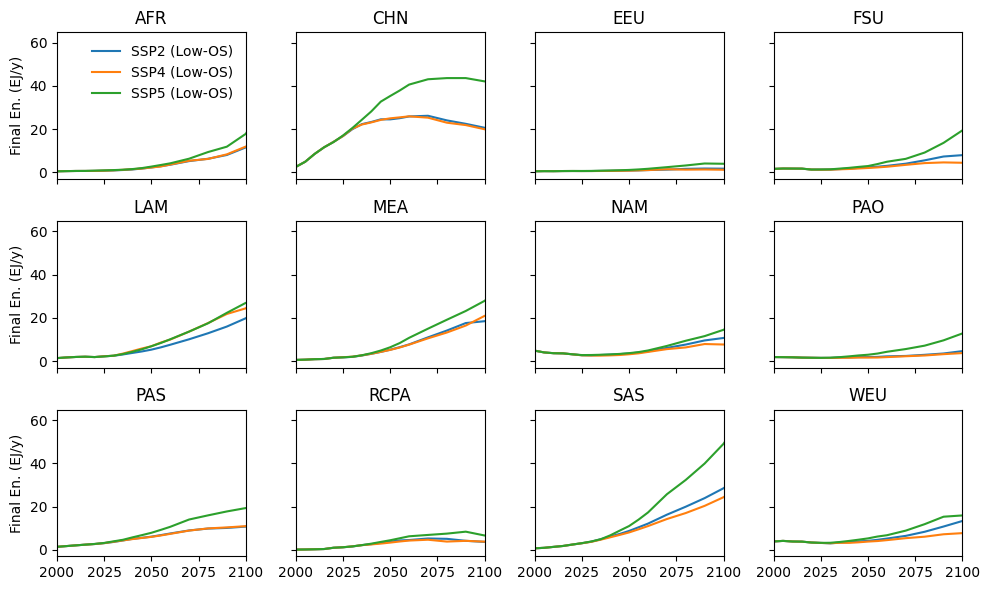

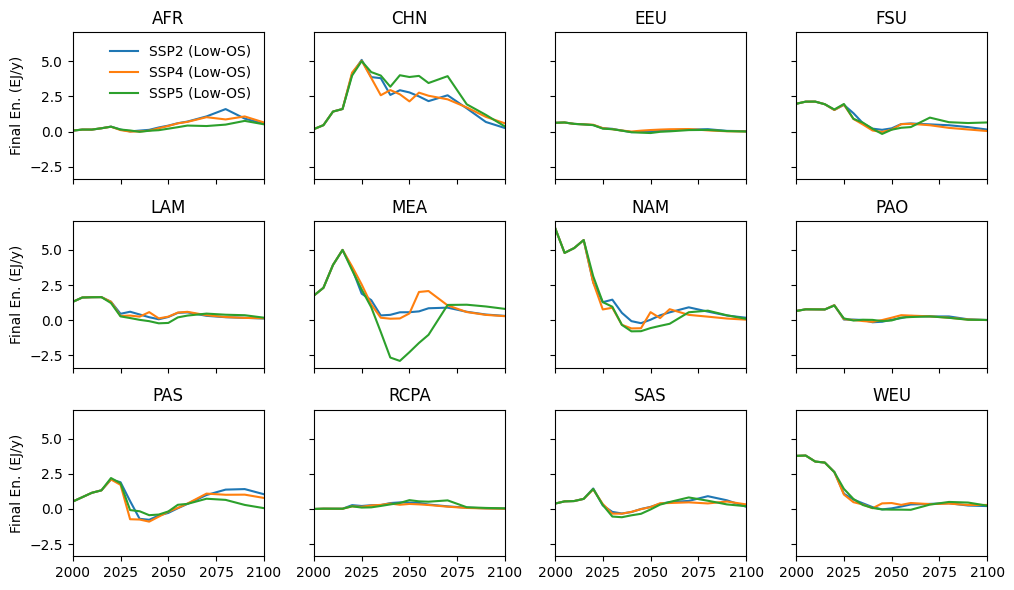

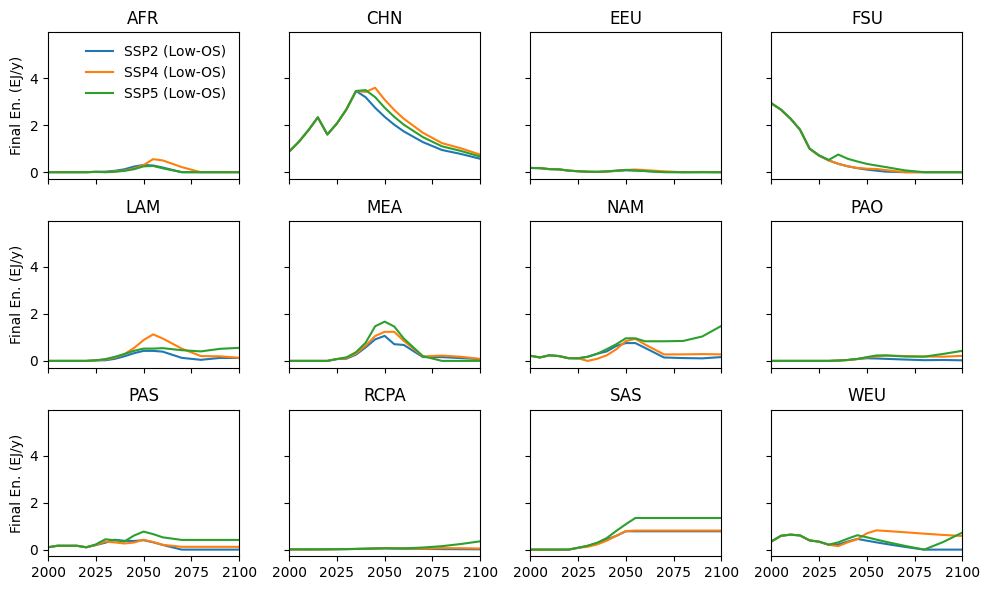

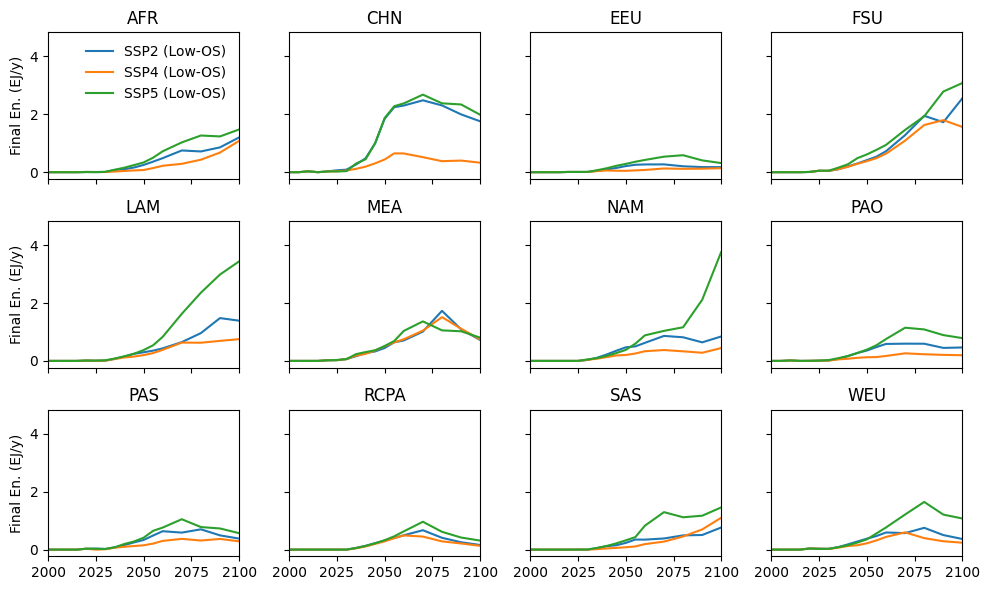

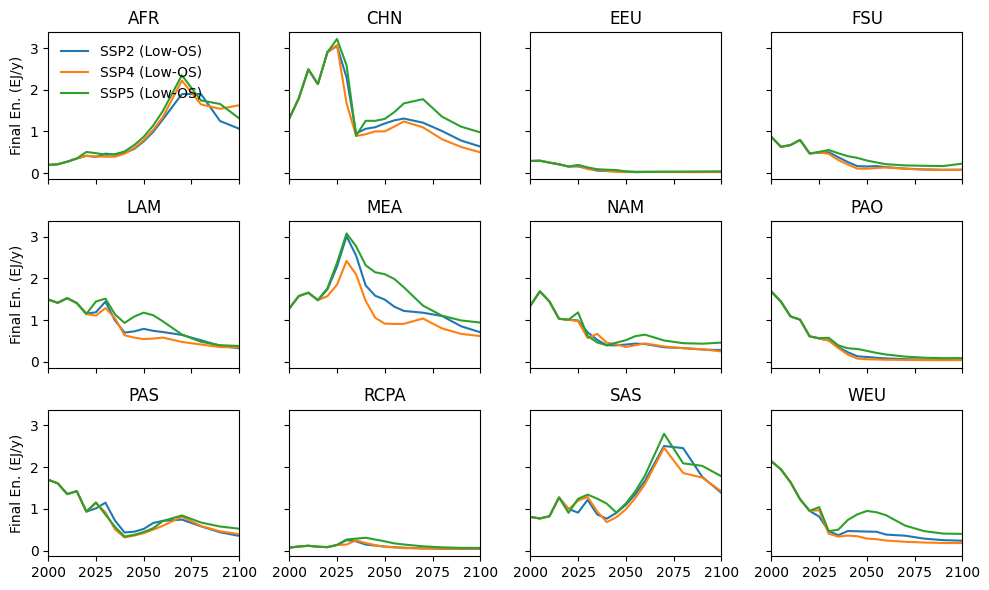

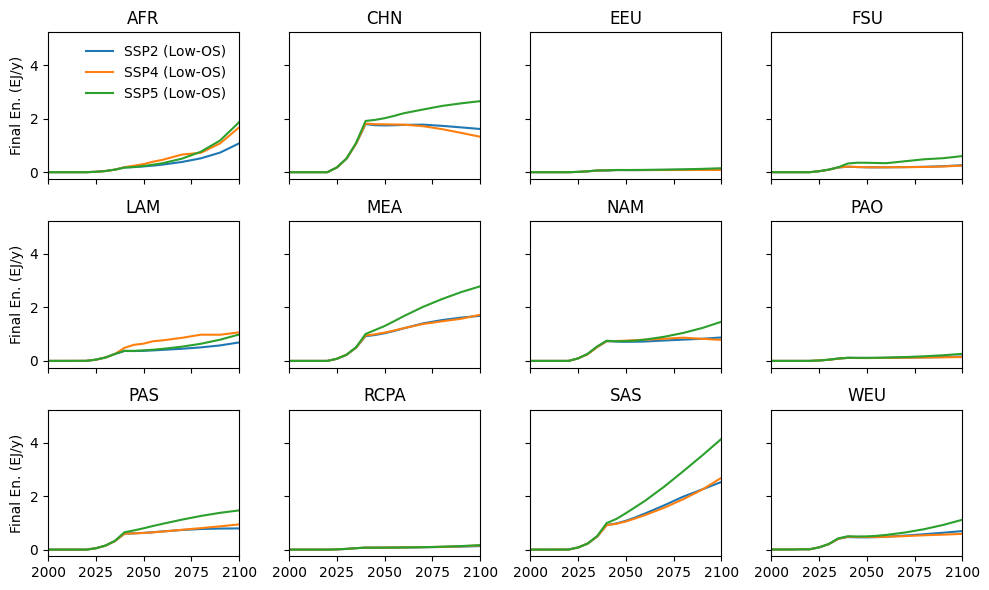

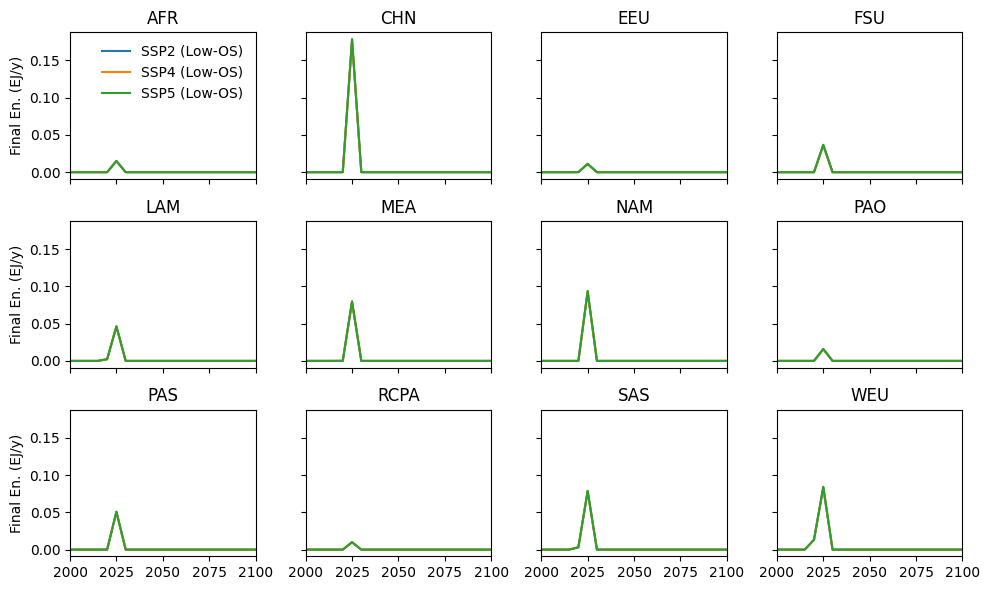

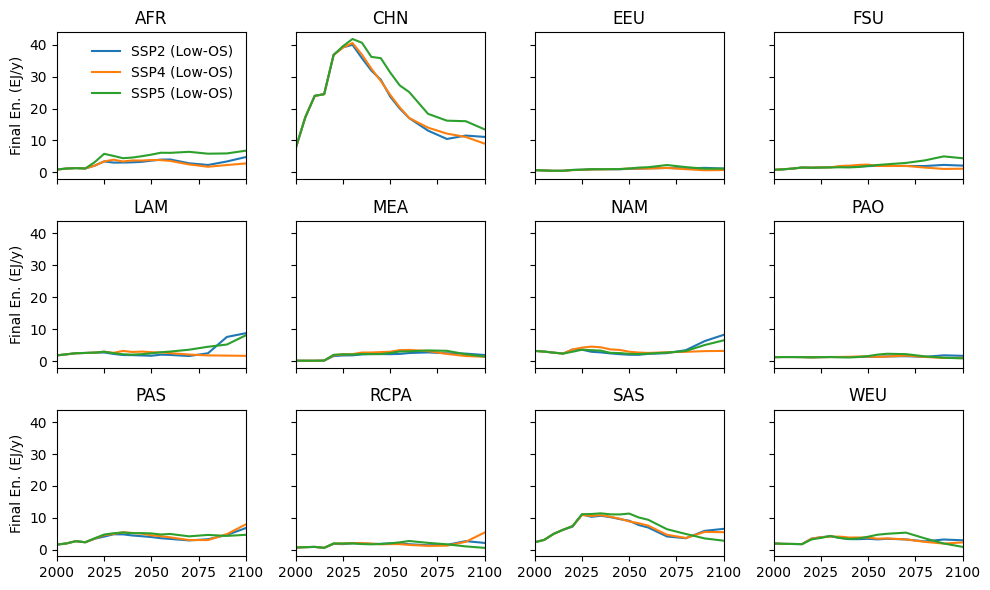

In [10]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = [
"Final Energy|Industry|Electricity",
"Final Energy|Industry|Gases",
"Final Energy|Industry|Heat",
"Final Energy|Industry|Hydrogen",
"Final Energy|Industry|Liquids",
"Final Energy|Industry|Other",
"Final Energy|Industry|Solar",
"Final Energy|Industry|Solids",
]

regions = ["AFR","CHN","EEU","FSU","LAM","MEA","NAM","PAO","PAS","RCPA","SAS","WEU"]

# SSP2
f2name = '/SSP_SSP2_v1.0_SSP2 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df2 = pd.read_excel(path+f2name)
df2 = df2.fillna('0')
df2 = pyam.IamDataFrame(data=df2)

# SSP4
f4name = '/SSP_SSP4_v1.0_SSP4 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df4 = pd.read_excel(path+f4name)
df4 = df4.fillna('0')
df4 = pyam.IamDataFrame(data=df4)

# SSP5
f5name = '/SSP_SSP5_v1.0_SSP5 - Low Overshoot_Relaxed-CCS-v2.xlsx'
df5 = pd.read_excel(path+f5name)
df5 = df5.fillna('0')
df5 = pyam.IamDataFrame(data=df5)


for var in var_plot:
    fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,6), sharex=True, sharey=True)
    counter = 0
    for reg in regions:
        r = np.int(np.floor(counter/4))
        c = np.int(counter - 4*r)

        data2_plot = list(df2.filter(region=reg, variable=var).timeseries().iloc[0])
        data4_plot = list(df4.filter(region=reg, variable=var).timeseries().iloc[0])
        data5_plot = list(df5.filter(region=reg, variable=var).timeseries().iloc[0])
        years = list(df2.timeseries().columns)

        
        axs[r,c].plot(years, data2_plot, label=f'SSP2 (Low-OS)')
        axs[r,c].plot(years, data4_plot, label=f'SSP4 (Low-OS)')
        axs[r,c].plot(years, data5_plot, label=f'SSP5 (Low-OS)')

        axs[r,c].set_title(reg)

        if c == 0:
            axs[r,c].set_ylabel("Final En. (EJ/y)")
            #axs[r,c].set_ylim(-22,52)
            axs[r,c].set_xlim(2000,2100)

        counter += 1

    vname = var.replace('|','-')
    axs[0,0].legend(ncol=1, frameon=False)

    plt.tight_layout()
    fig.savefig(f'sspreview_sv1/{vname}_REG.png', dpi=150)
    plt.show()